## Data Science Project To Predict House Prices with Advanced Statistical Concepts

#### Project Name: House Price Prediction

#### Nature Of Output Feature : Regression

### Life Cycle Of DataScience Project

1. Exploratory Data Analysis 
2. Feature Engineering
3. Feature Selection
4. Model Building
5. Model Deployment

### EDA Starts From Here

In [1]:
#Importing all Necessary libraries For EDA

import numpy as np
import pandas as pd
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Reading Required Data

data_train = pd.read_csv('train.csv')
data_test = pd.read_csv('test.csv')
dataset = pd.concat((data_train,data_test))
data_train.shape
# Setting the target Variable
SalePrice = data_train["SalePrice"]


In [3]:
#Basic Builtin EDA functions are pretty handy sometimes
data_train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [4]:
statistics_of_data = []
for col in data_train.columns:
  statistics_of_data.append((col,
                             data_train[col].nunique(),
                             data_train[col].isnull().sum()*100/data_train.shape[0],
                             data_train[col].value_counts(normalize=True, dropna=False).values[0] * 100, 
                             data_train[col].dtype
                             ))
stats_df = pd.DataFrame(statistics_of_data, columns=['Feature', 'Uniq_val', 'missing_val', 'val_biggest_cat', 'type'])

In [5]:
stats_df.sort_values('missing_val', ascending=False)

,Feature,Uniq_val,missing_val,val_biggest_cat,type
72,PoolQC,3,99.520548,99.520548,object
74,MiscFeature,4,96.301370,96.301370,object
6,Alley,2,93.767123,93.767123,object
73,Fence,4,80.753425,80.753425,object
57,FireplaceQu,5,47.260274,47.260274,object
3,LotFrontage,110,17.739726,17.739726,float64
59,GarageYrBlt,97,5.547945,5.547945,float64
64,GarageCond,5,5.547945,90.821918,object
58,GarageType,6,5.547945,59.589041,object
60,GarageFinish,3,5.547945,41.438356,object


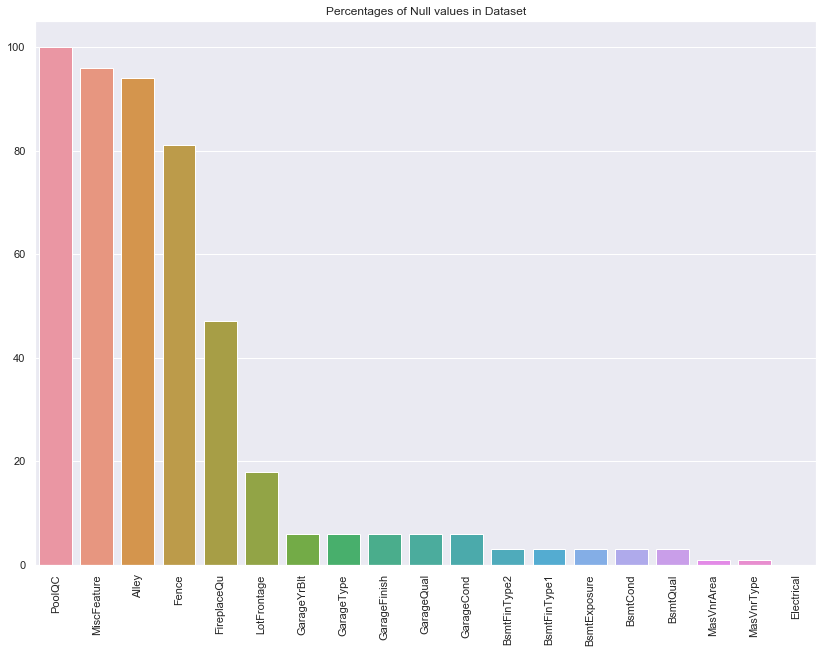

In [6]:
# Plotting Null Values for better Visualization

def plotNull_Values(dataset):
    null_Values = (dataset.isnull().sum() / len(dataset)) * 100
    
    try:
        # droping columns having null percentage to 0
        null_Values = round(null_Values.drop(null_Values[null_Values == 0].index)).sort_values(ascending = False)
        
        # plotting the bar plot of NULL %
        plt.figure(figsize = (14,10))
        null_plot = sns.barplot(x = null_Values.index , y = null_Values)
        plt.xticks(rotation = "90")
        plt.title("Percentages of Null values in Dataset")
        plt.show()
                
    except:
        print("There is NO null values in the dataset")
        print("Returning the dataset....")
        return dataset
    
    return null_plot

plotNull_Values(data_train)

In [7]:
#Remove top 4 features having 80%+ null values

data_train.drop(columns = ["Id","PoolQC", "MiscFeature","Alley",
                        "Fence"], axis = 1, inplace = True)
data_train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000


In [8]:
data_train.shape

(1460, 76)

### Statistical Analysis:::

### Anova -
Analysis of variance (ANOVA) provides a statistical test of whether two or more population means are equal, and therefore generalizes the t-test beyond two means.

### One Way F-test(Anova) :
It tell whether two or more groups are similar or not based on their mean similarity and f-score.

### F-test score: 
ANOVA assumes the means of all groups are the same (Ho), calculates how much the actual means deviate from the assumption, and reports it as the F-test score. A larger score means there is a larger difference between the means.

### P-value: 
P-value tells how statistically significant is our calculated score value.

In [9]:
# Applying Some Statistical Test
class Statistical_tests:
    def __init__(self, train):
        self.train = train
        
    # ---------------------------- FUNCTION 1: ANOVA ---------------------------------#
    def Anova(self):
        from scipy import stats
        Numeric_features = self.train.select_dtypes(exclude = 'O').columns
        print(Numeric_features)
        categoric_features = self.train.select_dtypes(exclude = [np.number]).columns
        data_train[categoric_features] = data_train[categoric_features].fillna("missing")

        # Making the ANOVA
        anova = {"feature":[], "f":[], "p":[]}
        for cat in data_train[categoric_features]:
            group_prices = []
    
            for group in data_train[cat].unique():
                #print("Group"+group)
                #print(data_train[data_train[cat] == group])
                group_prices.append(data_train[data_train[cat] == group]["SalePrice"].values)
            
            f, p = stats.f_oneway(*group_prices)
            anova['feature'].append(cat)
            anova['f'].append(f)
            anova['p'].append(p)

        anova = pd.DataFrame(anova)
        anova = anova[["feature","f","p"]]
        anova.sort_values("p", inplace = True)
        

        return anova

In [10]:
# Accessing the Class + method
sts = Statistical_tests(data_train)
sts.Anova()

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')


,feature,f,p
7,Neighborhood,71.784865,1.558600e-225
17,ExterQual,443.334831,1.439551e-204
20,BsmtQual,316.148635,8.158548e-196
29,KitchenQual,407.806352,3.032213e-192
33,GarageFinish,213.867028,6.228747e-115
31,FireplaceQu,121.075121,2.971217e-107
19,Foundation,100.253851,5.791895e-91
32,GarageType,80.379992,6.117026e-87
23,BsmtFinType1,64.688200,2.386358e-71
26,HeatingQC,88.394462,2.667062e-67


In [11]:
#Since p value is less than 0.05, we are rejecting null and accepting alternate hypothesis.

# Dropping the Irrelevent columns
data_train.drop(columns=["Street", "Utilities", "LandSlope"], 
             axis= 1, inplace = True)
data_train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Reg,Lvl,Inside,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,missing,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Reg,Lvl,FR2,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,IR1,Lvl,Inside,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,IR1,Lvl,Corner,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,IR1,Lvl,FR2,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000


From the Anova: I can Conclude that the Features having P-Value >= 0.05 is NOT Relevent in predicting the Target when they are used in Model Building. Hence, We will remove those irrelevent features

Therefore Street, landSlope and Utilities are NOT important in Predicting the Target SalePrice

### Target Transformation
* The distribution of a variable is a description of the relative numbers of times each possible outcome will occur in a number of trials. The function describing the probability that a given value will occur is called the probability density function (abbreviated PDF), and the function describing the cumulative probability that a given value or any value smaller than it will occur is called the distribution function (or cumulative distribution function, abbreviated CDF).

* If our Target is not Normally distributed, then it will impact the performance of linear Models 


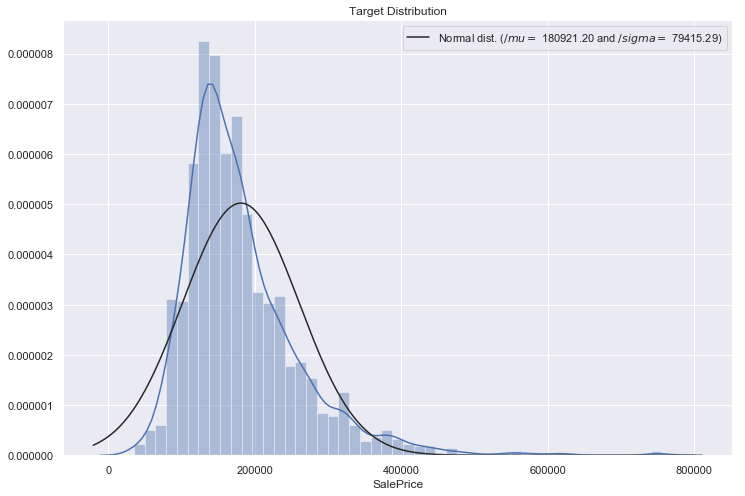

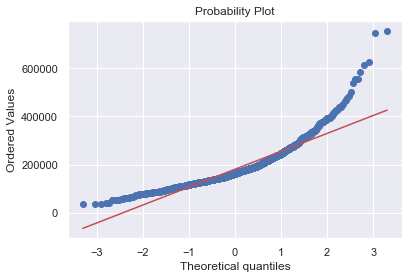

AxesSubplot(0.125,0.125;0.775x0.755)
((array([-3.30513952, -3.04793228, -2.90489705, ...,  2.90489705,
        3.04793228,  3.30513952]), array([ 34900,  35311,  37900, ..., 625000, 745000, 755000], dtype=int64)), (74160.16474519414, 180921.19589041095, 0.9319665641512983))
--------------------------------------------------


In [12]:
class Transform_target_distribution:
    def __init__(self, target):
        self.target = target
     
    # -------------------- FUNCTION 1: INITIAL DISTRIBUTION -----------------------------#
    # Initial distribution of the Target
    def check_target_distribution(self):
        from scipy import stats
        plt.figure(figsize = (12,8))
        plot1 = sns.distplot(self.target , fit = stats.norm)
        plt.title("Target Distribution")
    
        # getting the params
        (mu, sigma) = stats.norm.fit(self.target)
        # legend of the distribution
        plt.legend(["Normal dist. ($/mu=$ {:.2f} and $/sigma=$ {:.2f})".format(mu, sigma)], loc="best")
 
        # making the QQ plot / Probability plot 
        fig = plt.figure()
        plot2 = stats.probplot(self.target, plot = plt)
        plt.show()
    
        # printing the plots
        print(plot1)
        print(plot2)
        print("-"*50)
   
    # -------------------- FUNCTION 2: TRANSFORMED DISTRIBUTION -------------------------#
    # Transforming the distribution of the Target
    def log_distribution(self):
        from scipy import stats
        target2 = np.log(self.target)
        plt.figure(figsize = (12,8))
        plot3 = sns.distplot(target2 , fit = stats.norm)
        plt.title("Target Distribution")
    
        # getting the params
        (mu, sigma) = stats.norm.fit(target2)
        # legend of the distribution
        plt.legend(["Normal dist. ($/mu=$ {:.2f} and $/sigma=$ {:.2f})".format(mu, sigma)], loc="best")
 
        # making the QQ plot / Probability plot 
        fig = plt.figure()
        plot4 = stats.probplot(target2, plot = plt)
        plt.show()
    
        print(plot3)
        print(plot4)
        print("-"*50)
        
    #---------------------------------------------------------------------------------------
    

# Accessing the Class
object = Transform_target_distribution(data_train["SalePrice"])
object.check_target_distribution()
#object.log_distribution()

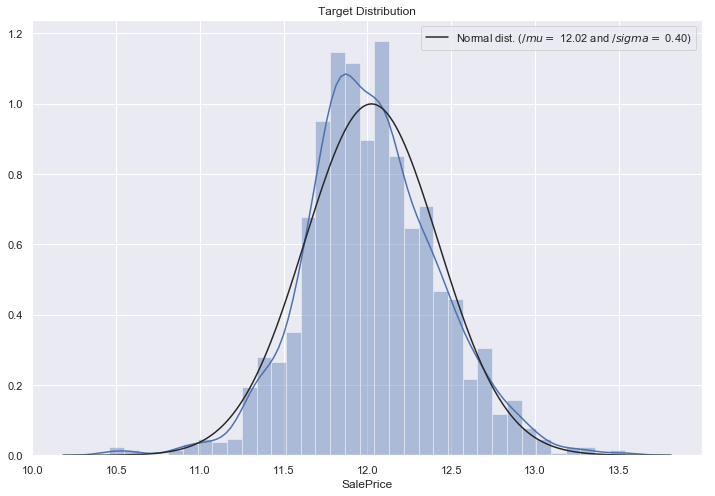

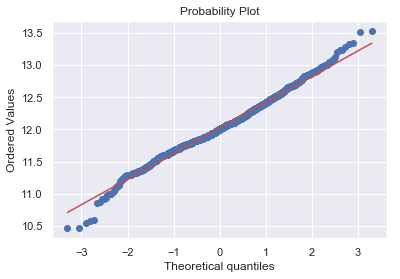

AxesSubplot(0.125,0.125;0.775x0.755)
((array([-3.30513952, -3.04793228, -2.90489705, ...,  2.90489705,
        3.04793228,  3.30513952]), array([10.46024211, 10.47194981, 10.54270639, ..., 13.34550693,
       13.5211395 , 13.53447303])), (0.3982622308161888, 12.024050901109383, 0.9953761475636613))
--------------------------------------------------


In [13]:
object.log_distribution()

In [14]:
# Changing Saleprice to log(SalePrice)
data_train["SalePrice"] = np.log(data_train["SalePrice"])

### *Correration Coefficient* -
The correlation coefficient is a statistical measure of the strength of the relationship between the relative movements of two variables. The values range between -1.0 and 1.0. A calculated number greater than 1.0 or less than -1.0 means that there was an error in the correlation measurement. A correlation of -1.0 shows a perfect negative correlation, while a correlation of 1.0 shows a perfect positive correlation. A correlation of 0.0 shows no linear relationship between the movement of the two variables.

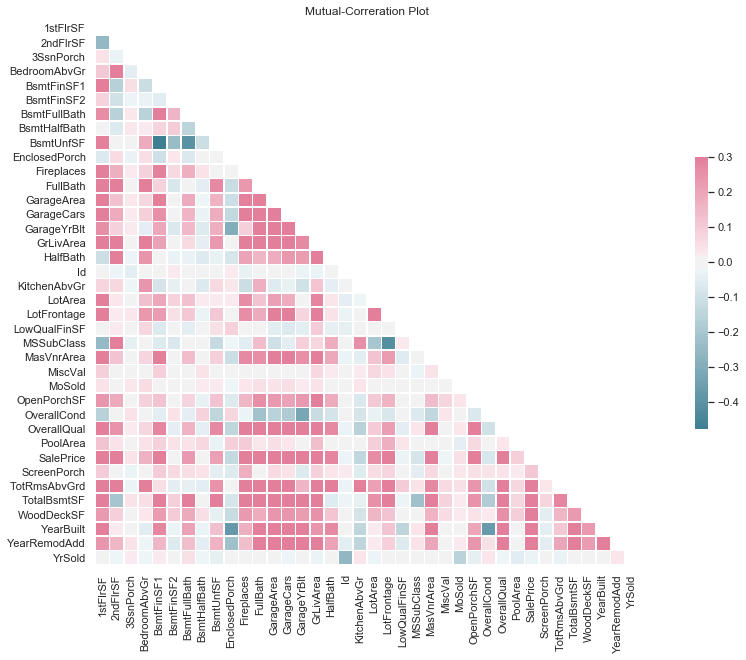

----------------------------------------
Number of Correlated features: 4
List of Correlated Features: ['TotalBsmtSF', 'GarageCars', 'TotRmsAbvGrd', 'YearBuilt']
----------------------------------------
      feature_1     feature_2  correration
0    GarageCars    GarageArea     0.889700
1    GarageArea    GarageCars     0.889700
2   GarageYrBlt     YearBuilt     0.834812
3     YearBuilt   GarageYrBlt     0.834812
4     GrLivArea  TotRmsAbvGrd     0.808354
5  TotRmsAbvGrd     GrLivArea     0.808354
6      1stFlrSF   TotalBsmtSF     0.801670
7   TotalBsmtSF      1stFlrSF     0.801670


In [15]:
# Correration-Coefficient class
class Correlation:
    def __init__(self, dataset):
        self.dataset = dataset
        
    
    # ------------------------ FUNCTION 1: CORRERATION-COEFFICIENT ------------------------#
    # Making a Correration-coefficient plot
    def correlation_coefficient(self):
        # taking only numeric columns + corr_matrix
        numeric_features = self.dataset.select_dtypes(include = [np.number])
        corr_matrix = numeric_features.corr()
        
        # Setting style + mask + axes + custom_cmap
        sns.set(style = "white")
        mask = np.triu(np.ones_like(corr_matrix, dtype = np.bool))
        f, ax = plt.subplots(figsize = (20, 10))
        cmap = sns.diverging_palette(220, 1, as_cmap=True)
        
        # Setting the Heatmap
        sns.heatmap(data = corr_matrix, 
                    mask=mask, 
                    cmap=cmap, 
                    vmax=.3, 
                    center=0,
                    square=True, 
                    linewidths=.5, 
                    cbar_kws={"shrink": .5})
        
        plt.title("Mutual-Correration Plot")
        plt.show()
    
    # ----------------------- FUNCTION 2: CORRERATED-FEATURES ---------------------------#
    # Getting the list of Correlated features
    def select_correlation(self):
        # making a set
        corr_set = set()
    
        # making a corr matrix
        corr_matrix = self.dataset.corr()
    
        # select value under some threshold
        for i in range(len(corr_matrix.columns)):
            for j in range(i):
                if abs(corr_matrix.iloc[i,j]) > 0.8:
                    matrix = corr_matrix.columns[i]
                
                    # adding the values in set
                    corr_set.add(matrix)
    
        print("-"*40)
        print("Number of Correlated features: {}".format(len(corr_set)))
        print("List of Correlated Features: {}".format(list(corr_set)))
        print("-"*40)
    
    
    # --------------------- FUNCTION 3: FEATURES-CORRERATION ----------------------------#
    def feature_correlation(self):
        corr_matrix = self.dataset.corr()
        corr_matrix = corr_matrix.abs().unstack()
        corr_matrix = corr_matrix.sort_values(ascending = False)
    
        #select values of corr_matrix above the threshold set
        corr_matrix = corr_matrix[(corr_matrix >= 0.8) & (corr_matrix < 1)]
    
        corr_matrix = pd.DataFrame(corr_matrix).reset_index()
        corr_matrix.columns = ["feature_1","feature_2", "correration"]
    
        print(corr_matrix)
    
    #------------------------------------------------------------------------------------#
        
# Accessing the Correration Class + methods
corr_class = Correlation(dataset)
corr_class.correlation_coefficient()
corr_class.select_correlation()
corr_class.feature_correlation()

* From the above plot, I can conclude that there are total of 4 variables correrated with each other, which adds redundent information in our dataset.
* Multicoliniear causes affect the accuracy of linear models like SVM, Multiple Regression etc..

In [16]:
numerical_features = [feature for feature in data_train.columns if data_train[feature].dtypes != 'O' ]
temporal_features = [feature for feature in numerical_features if 'Yr' in feature or 'Year' in feature ]
print(len(temporal_features))
data_train[temporal_features].head()

4


,YearBuilt,YearRemodAdd,GarageYrBlt,YrSold
0,2003,2003,2003.0,2008
1,1976,1976,1976.0,2007
2,2001,2002,2001.0,2008
3,1915,1970,1998.0,2006
4,2000,2000,2000.0,2008


In [17]:
# let's explore the content of these year variables
for feature in temporal_features:
    print(feature, data_train[feature].unique())

YearBuilt [2003 1976 2001 1915 2000 1993 2004 1973 1931 1939 1965 2005 1962 2006
 1960 1929 1970 1967 1958 1930 2002 1968 2007 1951 1957 1927 1920 1966
 1959 1994 1954 1953 1955 1983 1975 1997 1934 1963 1981 1964 1999 1972
 1921 1945 1982 1998 1956 1948 1910 1995 1991 2009 1950 1961 1977 1985
 1979 1885 1919 1990 1969 1935 1988 1971 1952 1936 1923 1924 1984 1926
 1940 1941 1987 1986 2008 1908 1892 1916 1932 1918 1912 1947 1925 1900
 1980 1989 1992 1949 1880 1928 1978 1922 1996 2010 1946 1913 1937 1942
 1938 1974 1893 1914 1906 1890 1898 1904 1882 1875 1911 1917 1872 1905]
YearRemodAdd [2003 1976 2002 1970 2000 1995 2005 1973 1950 1965 2006 1962 2007 1960
 2001 1967 2004 2008 1997 1959 1990 1955 1983 1980 1966 1963 1987 1964
 1972 1996 1998 1989 1953 1956 1968 1981 1992 2009 1982 1961 1993 1999
 1985 1979 1977 1969 1958 1991 1971 1952 1975 2010 1984 1986 1994 1988
 1954 1957 1951 1978 1974]
GarageYrBlt [2003. 1976. 2001. 1998. 2000. 1993. 2004. 1973. 1931. 1939. 1965. 2005.
 1962. 2006.

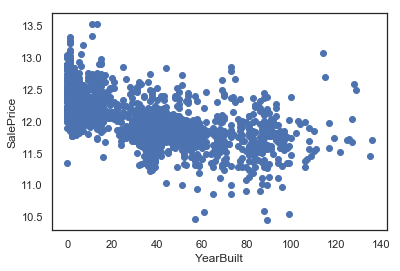

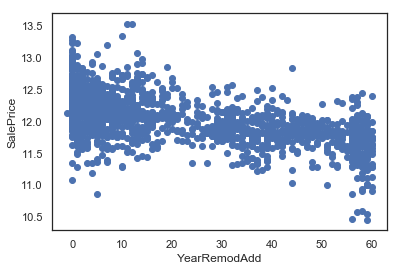

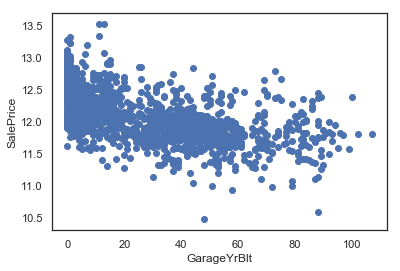

In [18]:
## Here we will compare the difference between temporal features with SalePrice

for feature in temporal_features:
    if feature!='YrSold':
        data=data_train.copy()
        ## We will capture the difference between year variable and year the house was sold for
        data[feature]=data['YrSold']-data[feature]
        

        plt.scatter(data[feature],data['SalePrice'])
        plt.xlabel(feature)
        plt.ylabel('SalePrice')
        plt.show()

### Categorical Features Analysis

Features in dataset 'Alley' has '2' unique categories
Features in dataset 'BldgType' has '5' unique categories
Features in dataset 'BsmtCond' has '4' unique categories
Features in dataset 'BsmtExposure' has '4' unique categories
Features in dataset 'BsmtFinType1' has '6' unique categories
Features in dataset 'BsmtFinType2' has '6' unique categories
Features in dataset 'BsmtQual' has '4' unique categories
Features in dataset 'CentralAir' has '2' unique categories
Features in dataset 'Condition1' has '9' unique categories
Features in dataset 'Condition2' has '8' unique categories
Features in dataset 'Electrical' has '5' unique categories
Features in dataset 'ExterCond' has '5' unique categories
Features in dataset 'ExterQual' has '4' unique categories
Features in dataset 'Exterior1st' has '15' unique categories
Features in dataset 'Exterior2nd' has '16' unique categories
Features in dataset 'Fence' has '4' unique categories
Features in dataset 'FireplaceQu' has '5' unique categories
Feat

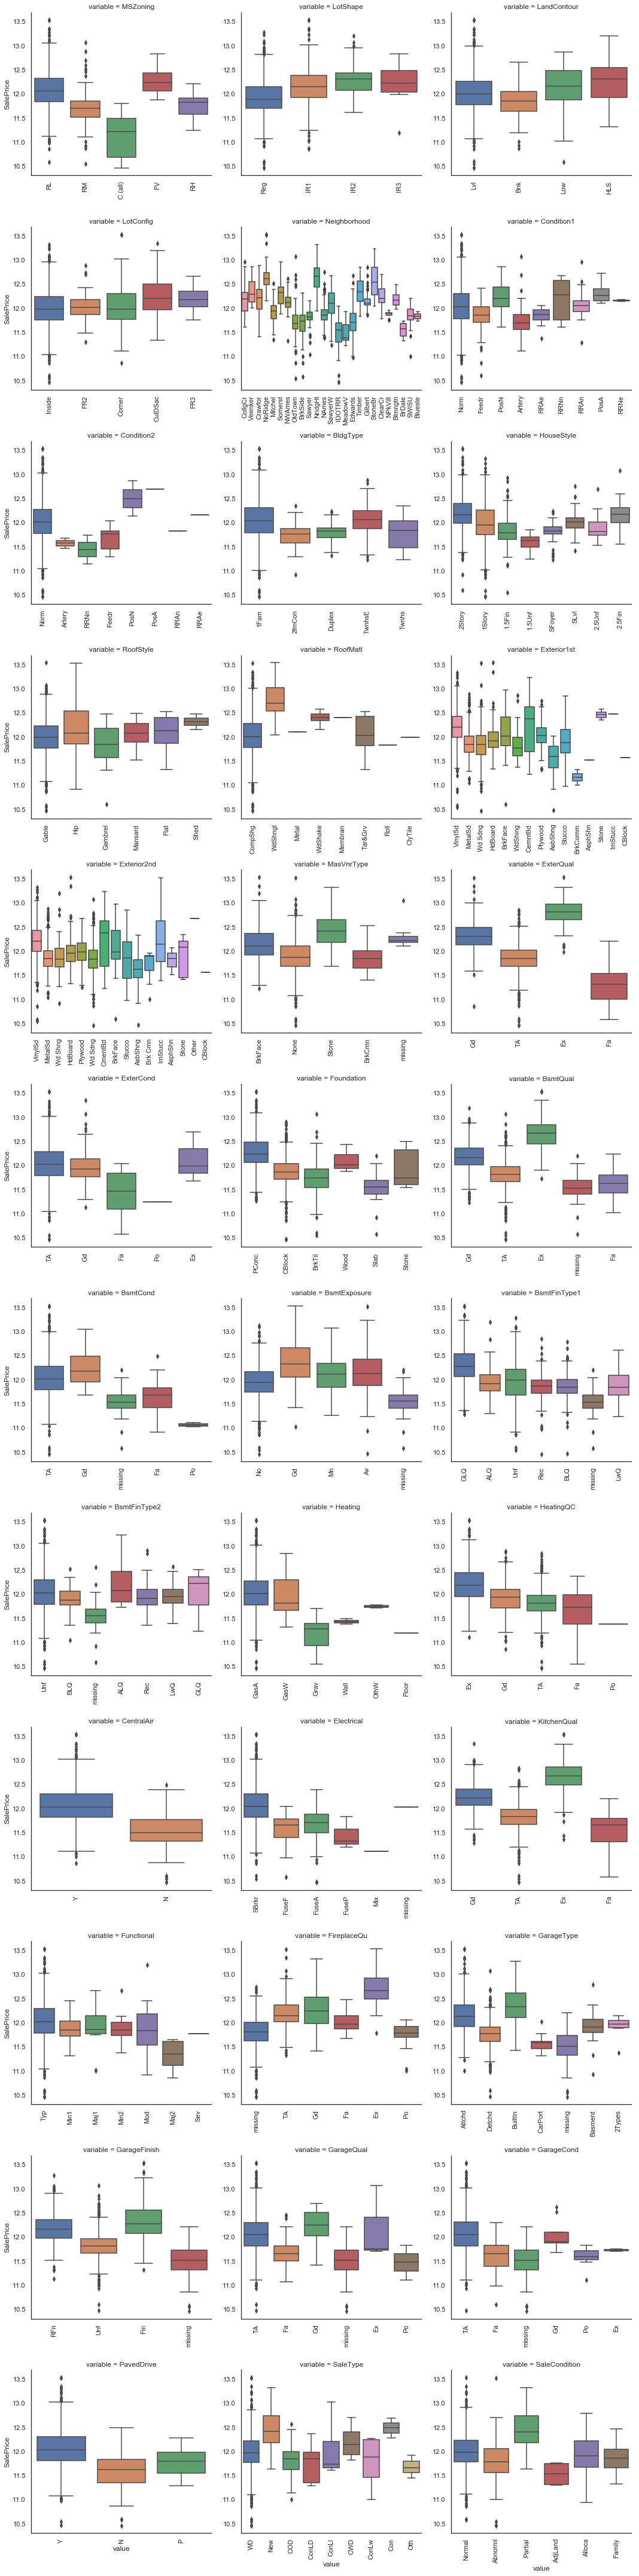

In [19]:
# Categorical Feature Analysis Class
class Categorical_feature_analysis:
    def __init__(self, dataset, train):
        self.dataset = dataset
        self.train = train
        
    # ------------------------------- FUNCTION 1: CARDINALITY ---------------------------------------------#
    # Function to Check Cardinality of the categorical features
    def Cardinality(self):
        for feature in self.dataset.columns:
            # Selecting only the categorical variables
            if self.dataset[feature].dtypes == 'object':
                # Filling the missing values with mode
                self.dataset[feature] = self.dataset[feature].fillna(self.dataset[feature].mode().iloc[0])
                # Selecting the len(unique values) of each categorical
                unique_category = len(self.dataset[feature].unique())
                print("Features in dataset '{column_name}' has '{unique_category}' unique categories".
                      format(column_name = feature, unique_category=unique_category))
    
    
    # --------------------------- FUNCTION 2: CARDINALITY PLOTS {Count plot} -------------------------------#
    def Cardinality_plot(self):
        # Selecting the Categorical features
        categoric_features = self.dataset.select_dtypes(exclude = [np.number])
        # Looping through all the categorical features
        for feature in categoric_features:
            c_data = self.dataset.copy()
            sns.countplot(categoric_features[feature])
            plt.xlabel(feature)
            plt.ylabel("Cardinality")
            plt.title(feature)
            plt.show()
            
    # ------------------------------------- FUNCTION 3: Outliers Analysis ---------------------------------#
    def Outliers_Analysis(self):
        # Selecting the categorical features
        categorical_features = self.train.select_dtypes(exclude = [np.number])
        # Looping through all the categorical features
        for feature in categorical_features:
            self.train[feature] = self.train[feature].astype("category")
            if self.train[feature].isnull().any():
                self.train[feature] = self.train[feature].cat.add_categories(["MISSING"])
                self.train[feature] = self.train[feature].fillna(["MISSING"])
                
        # Function: BOX Plot
        def box_plot(x, y, **kwargs):
            sns.boxplot(x = x, y = y)
            # x->rotation
            x = plt.xticks(rotation = 90)
        
        # Defining the Facedgrid and mapping box_plot 
        f = pd.melt(self.train, id_vars = ["SalePrice"], value_vars = categorical_features)
        g = sns.FacetGrid(f, col = "variable", col_wrap = 3, sharex = False, sharey = False, size = 5)
        g = g.map(box_plot, "value", "SalePrice")
    
    #--------------------------------------------------------------------------------------------------------#
        
        
# Accessing the Categorical Analysis Class + methods
cfa = Categorical_feature_analysis(dataset, data_train)
cfa.Outliers_Analysis()
cfa.Cardinality()

## Numerical Feature Analysis

In [20]:
# Numerical Feature Analysis
class Numerical_feature_analysis:
    def __init__(self, dataset, train):
        self.dataset = dataset
        self.train = train
    def Numeric_Outliers_Analysis(self):
        # Selecting the Numerical features
        numerical_features = [feature for feature in self.dataset.columns if self.dataset[feature].dtypes != 'O']
        print('Number of numerical variables: ', len(numerical_features))
        year_feature = [feature for feature in numerical_features if 'Yr' in feature or 'Year' in feature]
        discrete_feature=[feature for feature in numerical_features if len(self.dataset[feature].unique())<25 and feature not in year_feature+['Id']]
        #continuous_feature=[feature for feature in numerical_features if feature not in discrete_feature+year_feature+['Id']]
        #print(discrete_feature)
        print("Discrete Variables Count: {}".format(len(discrete_feature)))
        
        
        for feature in discrete_feature:
            self.train[feature] = self.train[feature].astype("int")
            if self.train[feature].isnull().any():
                self.train[feature] = self.train[feature].cat.add_categories(["MISSING"])
                self.train[feature] = self.train[feature].fillna(["MISSING"])
                
        # Function: BOX Plot
        def box_plot(x, y, **kwargs):
            sns.boxplot(x = x, y = y)
            # x->rotation
            x = plt.xticks(rotation = 90)
        
        # Defining the Facedgrid and mapping box_plot 
        f = pd.melt(self.train, id_vars = ["SalePrice"], value_vars = discrete_feature)
        g = sns.FacetGrid(f, col = "variable", col_wrap = 3, sharex = False, sharey = False, size = 5)
        g = g.map(box_plot, "value", "SalePrice")

    # -----------------------------------------------------------------------------------------------------#

Number of numerical variables:  38
Discrete Variables Count: 14


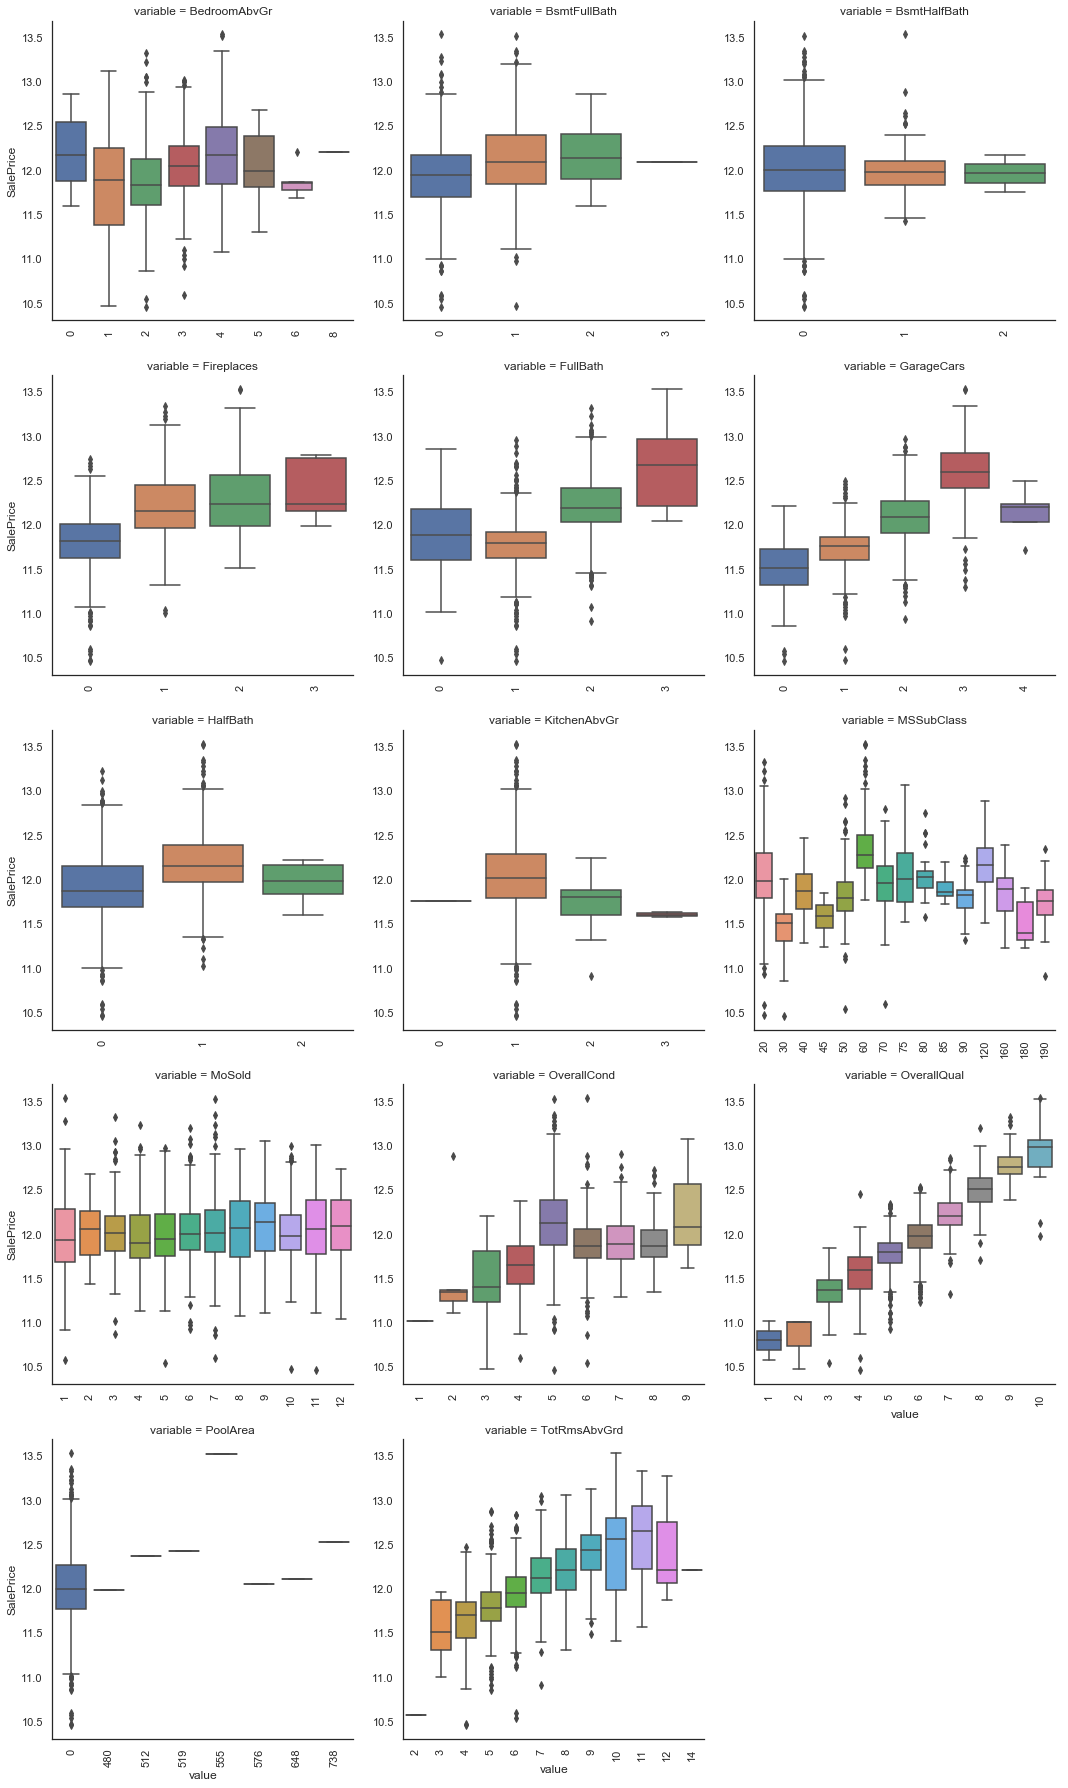

In [21]:

nfa = Numerical_feature_analysis(dataset, data_train)
nfa.Numeric_Outliers_Analysis()

### Feature Engineering Starts from here

## Missing Value Analysis::::

In [22]:
data_train['FireplaceQu'].head(20
                              )

0     missing
1          TA
2          TA
3          Gd
4          TA
5     missing
6          Gd
7          TA
8          TA
9          TA
10    missing
11         Gd
12    missing
13         Gd
14         Fa
15    missing
16         TA
17    missing
18    missing
19    missing
Name: FireplaceQu, dtype: category
Categories (6, object): [Ex, Fa, Gd, Po, TA, missing]

In [23]:
statistics_of_data = []
for col in dataset.columns:
  statistics_of_data.append((col,
                             dataset[col].nunique(),
                             dataset[col].isnull().sum()*100/dataset.shape[0],
                             dataset[col].value_counts(normalize=True, dropna=False).values[0] * 100, 
                             dataset[col].dtype
                             ))
stats_df = pd.DataFrame(statistics_of_data, columns=['Feature', 'Uniq_val', 'missing_val', 'val_biggest_cat', 'type'])

In [24]:
stats_df.sort_values('missing_val', ascending=False)

,Feature,Uniq_val,missing_val,val_biggest_cat,type
70,SalePrice,663,49.982871,49.982871,float64
50,LotFrontage,128,16.649538,16.649538,float64
37,GarageYrBlt,103,5.447071,5.447071,float64
55,MasVnrArea,444,0.787941,59.540939,float64
12,BsmtFullBath,4,0.068517,58.410415,float64
13,BsmtHalfBath,3,0.068517,93.936280,float64
75,TotalBsmtSF,1058,0.034258,2.672148,float64
31,GarageArea,603,0.034258,5.378554,float64
8,BsmtFinSF1,991,0.034258,31.825968,float64
9,BsmtFinSF2,272,0.034258,88.078109,float64


In [25]:
# ------------------------------- FIXING FIREPLACE QC ---------------------------------------------#
def Fireplace_Qu(dataset):
    # Dsiplaying the No. of missing values
    print("Number of missing Values in Fireplace Qu : {}"
          .format(dataset["FireplaceQu"].isnull().sum()))
    print("-"*50)
    
    # Setting My hypothesis:
    
    """
    Hypothesis -
    1) Fireplace QC features gives the info regarding the houses having some type of FirePlace in them.
    2) Since, This feature contains 690 missing values, So I believe that it is associated with houses 
       which doesn't have fireplace in them.
    3) Thus, we can fill the missing values with NONE, as doing this would be more appropiate for this feature
    
    """
    
    # Imputing the missing values with NONE
    dataset["FireplaceQu"] = dataset["FireplaceQu"].fillna("None")
    
    # Printing the No. of missing values after Imputation
    print("Number of missing Values in Fireplace Qu : {}"
          .format(dataset["FireplaceQu"].isnull().sum()))
    print("-"*50)
    
    # Setting the copy of filtered FirePlace
    filtered_fireplace = dataset["FireplaceQu"].copy()
    
    # Confirming the Imputation
    print("Comfirming the Imputation - ")
    print(pd.crosstab(dataset["FireplaceQu"], filtered_fireplace))
    print("-"*50)
    
# -------------------------------------------------------------------------------------------------#

# Checking our Hypothesis
Fireplace_Qu(dataset)

# Applying the hypothesis on this feature
dataset["FireplaceQu"] = dataset["FireplaceQu"].fillna("None")

Number of missing Values in Fireplace Qu : 0
--------------------------------------------------
Number of missing Values in Fireplace Qu : 0
--------------------------------------------------
Comfirming the Imputation - 
FireplaceQu  Ex  Fa    Gd  Po   TA
FireplaceQu                       
Ex           43   0     0   0    0
Fa            0  74     0   0    0
Gd            0   0  2164   0    0
Po            0   0     0  46    0
TA            0   0     0   0  592
--------------------------------------------------


In [27]:
# ------------------------------- FIXING LOTFRONTAGE ---------------------------------------------#
def LotFrontage(dataset):
    # Dsiplaying the No. of missing values
    print("-"*50)
    print("Number of missing Values in LotFrontage : {}"
          .format(dataset["LotFrontage"].isnull().sum()))
    print("-"*50)
    
    # Setting the hypothesis:
    
    """
    Hypothesis -
    1) From my Mutual-Correration plot, It is clear that this feature is not Correrated with other features.
    2) Thus, it is good to apply Median imputation, which is robust to Outliers 
    
    """
    
    # Setting the median
    median = dataset["LotFrontage"].median()
    
    # Imputing the missing values with median(LotFrontage)
    dataset["LotFrontage"] = dataset["LotFrontage"].fillna(median)
    
    # Printing the No. of missing values after Imputation
    print("Number of missing Values in LotFrontage : {}"
          .format(dataset["LotFrontage"].isnull().sum()))
    print("-"*50)
    
# -------------------------------------------------------------------------------------------------#

# Checking our Hypothesis
LotFrontage(dataset)

# Applying the hypothesis on this feature
dataset["LotFrontage"] = dataset["LotFrontage"].fillna(dataset["LotFrontage"].median())

--------------------------------------------------
Number of missing Values in LotFrontage : 486
--------------------------------------------------
Number of missing Values in LotFrontage : 0
--------------------------------------------------


In [ ]:
# ------------------------------- FIXING ALL GARAGE FEATURES ---------------------------------------------#
def garage_features(dataset):
    # Displaying the No. of missing values in all garage features
    print("-"*50)
    print("Number of missing Values in GarageYrBlt : {}".format(dataset["GarageYrBlt"].isnull().sum()))
    print("Number of missing Values in GarageType : {}".format(dataset["GarageType"].isnull().sum()))
    print("Number of missing Values in GarageQual : {}".format(dataset["GarageQual"].isnull().sum()))
    print("Number of missing Values in GarageCond : {}".format(dataset["GarageCond"].isnull().sum()))
    print("Number of missing Values in GarageFinish : {}".format(dataset["GarageFinish"].isnull().sum()))
    print("-"*50)
    
  
    # Displaying the dtype of these garage features
    print("Number of missing Values in GarageYrBlt : {}".format(dataset["GarageYrBlt"].dtype))
    print("Number of missing Values in GarageType : {}".format(dataset["GarageType"].dtype))
    print("Number of missing Values in GarageQual : {}".format(dataset["GarageQual"].dtype))
    print("Number of missing Values in GarageCond : {}".format(dataset["GarageCond"].dtype))
    print("Number of missing Values in GarageFinish : {}".format(dataset["GarageFinish"].dtype))
    print("-"*50)
    
    # Setting My hypothesis
    """
    1) These all features are associated with houses having no Garage at all.
    2) Since, 4 of these are objects, then I will replace them with None.
    3) I will fill the 1 Numeric feature to 0.
    
    """
    
    # setting the Garage list
    garage_list = ["GarageYrBlt","GarageType","GarageQual","GarageCond","GarageFinish"]
    
    
    # Imputing all the Garage features 
    for feature in garage_list:
        if dataset[feature].dtype == np.object:
            # impute to None or else 0
            dataset[feature] = dataset[feature].fillna("None")
        else:
            dataset[feature] = dataset[feature].fillna(0)
    
    
    
    # Displaying the number of missing values after imputation
    print("After Imputation - ")
    print("Number of missing Values in GarageYrBlt : {}".format(dataset["GarageYrBlt"].isnull().sum()))
    print("Number of missing Values in GarageType : {}".format(dataset["GarageType"].isnull().sum()))
    print("Number of missing Values in GarageQual : {}".format(dataset["GarageQual"].isnull().sum()))
    print("Number of missing Values in GarageCond : {}".format(dataset["GarageCond"].isnull().sum()))
    print("Number of missing Values in GarageFinish : {}".format(dataset["GarageFinish"].isnull().sum()))
    print("-"*50)

# -------------------------------------------------------------------------------------------------#

# Checking our Hypothesis
garage_features(dataset)

# Applying the hypothesis on this feature
garage_list = ["GarageYrBlt","GarageType","GarageQual","GarageCond","GarageFinish"]
for feature in garage_list:
    if dataset[feature].dtype == np.object:
        dataset[feature] = dataset[feature].fillna("None")
    else:
        dataset[feature] = dataset[feature].fillna(0)

In [ ]:
# ------------------------------- FIXING ALL BASEMENT FEATURES ---------------------------------------------#
def basement_features(dataset):
    # Displaying the No. of missing values in all basement features
    print("-"*50)
    print("Number of missing Values in BsmtFinType2 : {}".format(dataset["BsmtFinType2"].isnull().sum()))
    print("Number of missing Values in BsmtExposure : {}".format(dataset["BsmtExposure"].isnull().sum()))
    print("Number of missing Values in BsmtFinType1 : {}".format(dataset["BsmtFinType1"].isnull().sum()))
    print("Number of missing Values in BsmtCond : {}".format(dataset["BsmtCond"].isnull().sum()))
    print("Number of missing Values in BsmtQual : {}".format(dataset["BsmtQual"].isnull().sum()))
    print("-"*50)
    
  
    # Displaying the dtype of these garage features
    print("Number of missing Values in BsmtFinType2 : {}".format(dataset["BsmtFinType2"].dtype))
    print("Number of missing Values in BsmtExposure : {}".format(dataset["BsmtExposure"].dtype))
    print("Number of missing Values in BsmtFinType1 : {}".format(dataset["BsmtFinType1"].dtype))
    print("Number of missing Values in BsmtCond : {}".format(dataset["BsmtCond"].dtype))
    print("Number of missing Values in BsmtQual : {}".format(dataset["BsmtQual"].dtype))
    print("-"*50)
    
     # Setting My hypothesis
    """
    1) These all features are associated with houses having no Basement at all.
    2) I will replace all the object variables with None.
    3) and fill Numeric feature to 0.
    
    """
    
    # setting the Basement list
    basement_list = ["BsmtFinType2", "BsmtExposure","BsmtFinType1", "BsmtCond","BsmtQual"]
                     
    # Imputing all the Garage features 
    for feature in basement_list:
        if dataset[feature].dtype == np.object:
            # impute to None or else 0
            dataset[feature] = dataset[feature].fillna("None")
        else:
            dataset[feature] = dataset[feature].fillna(0) 
    
    # Displaying the number of missing values after imputation
    print("After Imputation - ")
    print("Number of missing Values in BsmtFinType2 : {}".format(dataset["BsmtFinType2"].isnull().sum()))
    print("Number of missing Values in BsmtExposure : {}".format(dataset["BsmtExposure"].isnull().sum()))
    print("Number of missing Values in BsmtFinType1 : {}".format(dataset["BsmtFinType1"].isnull().sum()))
    print("Number of missing Values in BsmtCond : {}".format(dataset["BsmtCond"].isnull().sum()))
    print("Number of missing Values in BsmtQual : {}".format(dataset["BsmtQual"].isnull().sum()))
    print("-"*50)
    
# -------------------------------------------------------------------------------------------------#

# Checking our Hypothesis
basement_features(dataset)

# Applying the hypothesis on this feature
basement_list = ["BsmtFinType2", "BsmtExposure","BsmtFinType1", "BsmtCond","BsmtQual"]
for feature in basement_list:
    if dataset[feature].dtype == np.object:
        # impute to None or else 0
        dataset[feature] = dataset[feature].fillna("None")
    else:
        dataset[feature] = dataset[feature].fillna(0) 


In [ ]:
# ------------------------------- FIXING ALL MANSONRY FEATURES ---------------------------------------------#
def mansonry_features(dataset):
     # Displaying the No. of missing values in all mansonry features
    print("-"*50)
    print("Number of missing Values in MasVnrArea : {}"
          .format(dataset["MasVnrArea"].isnull().sum()))
    print("Number of missing Values in MasVnrType : {}"
          .format(dataset["MasVnrType"].isnull().sum()))
    print("-"*50)
    
    
    # Displaying the dtype of these mansonry features
    print("Number of missing Values in MasVnrArea : {}"
      .format(dataset["MasVnrArea"].dtype))
    print("Number of missing Values in MasVnrType : {}"
      .format(dataset["MasVnrType"].dtype))
    print("-"*50)
    
    # Setting the hypothesis
    
    """
    1) Here I will impute them  with the most frequent value for each column by taking mode.
    2) Mode is robust to Outliers
    
    """
    
    # Setting the Mansonry list
    mansonry_list = ["MasVnrArea", "MasVnrType"]
    
    # Imputing all the Mansonary features 
    for feature in mansonry_list:
        dataset[feature] = dataset[feature].fillna(dataset[feature].mode()[0]) 
    
    # Displaying the number of missing values after imputation
    print("After Imputation - ")
    print("Number of missing Values in MasVnrArea : {}"
          .format(dataset["MasVnrArea"].isnull().sum()))
    print("Number of missing Values in MasVnrType : {}"
          .format(dataset["MasVnrType"].isnull().sum()))
    print("-"*50)

# -------------------------------------------------------------------------------------------------#

# Checking our Hypothesis
mansonry_features(dataset)

# Applying the hypothesis on this feature
mansonry_list = ["MasVnrArea", "MasVnrType"]
for feature in mansonry_list:
    dataset[feature] = dataset[feature].fillna(dataset[feature].mode()[0]) 

In [ ]:
# ------------------------------- FIXING ELECTRICAL ---------------------------------------------#
def electrical(dataset):
    # Displaying the No. of missing values
    print("-"*50)
    print("Number of missing Values in Electrical : {}"
          .format(dataset["Electrical"].isnull().sum()))
    
    # Displaying the dtype of this features
    print("-"*50)
    print("Number of missing Values in Electrical : {}"
      .format(dataset["Electrical"].dtype))
    
    # Setting the hypothesis
    
    """
    1) Here I will impute them  with the most frequent value for each column by taking mode.
    2) Mode is robust to Outliers
    
    """
    
    # Imputing this feature 
    dataset["Electrical"] = dataset["Electrical"].fillna(dataset["Electrical"].mode()[0]) 
    
    # Displaying the number of missing values after imputation
    print("-"*50)
    print("After Imputation - ")
    print("Number of missing Values in Electrical : {}"
          .format(dataset["Electrical"].isnull().sum()))
    print("-"*50)
    
# -------------------------------------------------------------------------------------------------#

# Checking our Hypothesis
electrical(dataset)

# Applying the hypothesis on this feature
dataset["Electrical"] = dataset["Electrical"].fillna(dataset["Electrical"].mode()[0]) 

## Feature Encoding Phase

In [28]:
categoricalVariable = [feature for feature in dataset.columns if dataset[feature].dtype == 'O' ]
len(categoricalVariable)
for feature in categoricalVariable:
    temp = dataset.groupby(feature)['SalePrice'].count()/len(dataset)
    tempdf = temp[temp>0.01].index
    dataset[feature] = np.where(dataset[feature].isin(tempdf),dataset[feature],'Rare_var')

In [29]:
## Applying Lable Encoding technique to convert these text data data into suitable numeric form so that 
## our ML algorith can recognize its importance as well.
# Feature Encoding Technique -- Label Encoding
for feature in categoricalVariable:
    labels_ordered=dataset.groupby([feature])['SalePrice'].mean().sort_values().index
    labels_ordered={k:i for i,k in enumerate(labels_ordered,0)}
    dataset[feature]=dataset[feature].map(labels_ordered)

In [30]:
dataset.drop(columns = ["SalePrice"], axis = 1, inplace = True)

In [31]:
#MinMax Scaling

scaling_feature=[feature for feature in dataset.columns if feature not in ['Id','SalePerice'] ]

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(dataset[scaling_feature])

MinMaxScaler(copy=True, feature_range=(0, 1))

### Now you may apply lasso lasso from sklearn for feature selection, as we have discussed in our previous notebook. Its your homework